#Download Images data from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.97G/1.98G [00:19<00:00, 150MB/s]
100% 1.98G/1.98G [00:19<00:00, 107MB/s]


In [3]:
#Unzip file
import zipfile
zip_ref=zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

#Load images data

In [5]:
data_train_path='/content/train'
data_test_path='/content/test'
data_validation_path='/content/validation'

#Preprocessing Data

In [6]:
#Generator
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(180,180),
    batch_size=32,
    validation_split=False
)
data_val=tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    image_size=(180,180),
    shuffle=False,
    batch_size=32,
    validation_split=False
)
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(180,180),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [7]:
image_classes=data_train.class_names
print(image_classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


#Visualization

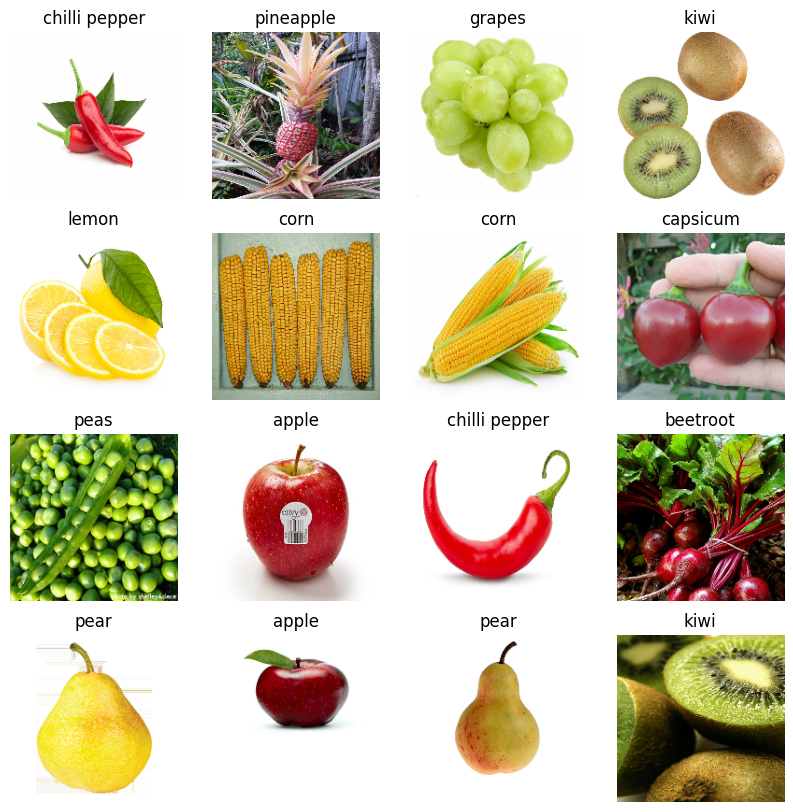

In [8]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1),
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(image_classes[labels[i]])
    plt.axis('off')

#Normalizing

In [9]:
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
data_train = data_train.map(process)
data_val= data_val.map(process)

#CNN Model

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(32,(3,3),1,activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(39,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [15]:
model.fit(data_train,validation_data=data_val,epochs=10)

Epoch 1/10
98/98 [==============================] - 74s 646ms/step - loss: 3.4817 - accuracy: 0.0645 - val_loss: 2.9604 - val_accuracy: 0.1624
Epoch 2/10
98/98 [==============================] - 68s 662ms/step - loss: 2.7679 - accuracy: 0.1917 - val_loss: 2.1282 - val_accuracy: 0.3533
Epoch 3/10
98/98 [==============================] - 67s 643ms/step - loss: 2.3150 - accuracy: 0.3095 - val_loss: 1.8528 - val_accuracy: 0.4672
Epoch 4/10
98/98 [==============================] - 69s 671ms/step - loss: 2.0106 - accuracy: 0.3945 - val_loss: 1.5424 - val_accuracy: 0.5328
Epoch 5/10
98/98 [==============================] - 68s 654ms/step - loss: 1.7240 - accuracy: 0.4742 - val_loss: 0.9976 - val_accuracy: 0.7208
Epoch 6/10
98/98 [==============================] - 65s 629ms/step - loss: 1.3542 - accuracy: 0.5907 - val_loss: 0.7331 - val_accuracy: 0.7778
Epoch 7/10
98/98 [==============================] - 65s 626ms/step - loss: 0.9578 - accuracy: 0.7127 - val_loss: 0.5901 - val_accuracy: 0.8519

In [16]:
model.save('Fruit_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import streamlit as st
from PIL import Image
import numpy as np

import tensorflow as tf
# Load your trained model and define the class_names
model = tf.keras.models.load_model('Fruit_classifier.h5')
# Replace with your class names
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper',
 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango',
 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans',
 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
# Define your predict function
def predict_image(img):
    # Preprocess the image
    img = np.array(img.resize((180, 180))) / 255.0  # Resize and normalize the image
    img = img.reshape(-1, 180, 180, 3)
    # Perform prediction
    prediction = model.predict(img)[0]
    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    # Get the corresponding class name
    predicted_class = class_names[predicted_class_index]
    # Return the predicted class name and its associated probability
    return predicted_class, float(prediction[predicted_class_index])





# Streamlit interface
st.title("Fruit and Vegitable Classification")
uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    image = Image.open(uploaded_image)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    st.write("")
    st.write("Classifying...")
    predicted_class, confidence = predict_image(image)
    st.write(f"Prediction: {predicted_class}, Confidence: {confidence:.2f}")

